## Import Libraries

In [ ]:
#Checkpoints:
#Optimization of alpha values
#visuals
#SVM

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set()

df = pd.read_csv('/Users/sandeepk/Downloads/Beijing_Data/Beijing_Weather.csv')

## Data Cleansing and Analyis

In [90]:
#Clean Dataset
df.dropna(subset=['DEWP', 'TEMP'])
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [203]:
#Recieve na reporting
ls = list(df.columns)
for x in ls:
    if sum(df[x].isna()) > 0:
        print(x)
        print(sum(df[x].isna()))


Options to View Outliers
1 No
2 year
3 month
4 day
5 hour
6 PM2.5
7 PM10
8 SO2
9 NO2
10 CO
11 O3
12 TEMP
13 PRES
14 DEWP
15 RAIN
16 wd
17 WSPM
18 station
12
Descriptive Statistics
---------------------
MAX: 40.40
MIN: -16.80
AVG: 13.62
STDV: 11.22
Percentiles:
0.250     3.6
0.500    14.6
0.999    35.9
Name: TEMP, dtype: float64


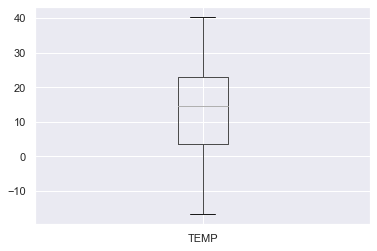

In [102]:
index = 0
print("Options to View Outliers")
for x in df.columns:
    index += 1
    print(index, x)
choice = int(input())
z = df.columns[choice-1]
bplot = df.boxplot(column = [z])
print("Descriptive Statistics")
print('---------------------')
print(f'MAX: {df[z].max():,.2f}')
print(f'MIN: {df[z].min():,.2f}')
print(f'AVG: {df[z].mean():,.2f}')
print(f'STDV: {df[z].std():,.2f}')
print("Percentiles:")
print(df[z].quantile(q=[0.25,0.5,0.999]))

## LINEAR REGRESSION
- Predictor: Dew Point
- Target: Temperature

In [104]:
#Import Regression and ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

x = df['DEWP']
y = df['TEMP']

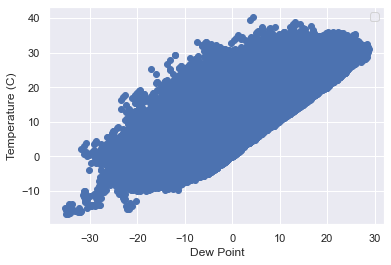

In [26]:
#Visualization of relationship (Dew Point + Temperature)
plt.xlabel("Dew Point")
plt.ylabel("Temperature (C)")
plt.legend("Relationship (Dew Point + Temperature)")
plt.plot(x,y, 'o')

plt.show()

In [27]:
#Split Data into Training and Testing (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train = x_train.values.reshape(-1,1)

x_test = x_test.values.reshape(-1,1)

#Model Development
lr_model = LinearRegression().fit(x_train, y_train)

In [28]:
#Prediction and Performance Evaluation
y_pred = lr_model.predict(x_test)
r2_test = r2_score(y_test,y_pred)

y_pred_train = lr_model.predict(x_train)
r2_train = r2_score(y_train,y_pred_train)

r2_scores = pd.DataFrame()
r2_scores["LR"] = [r2_test,r2_train]
r2_scores.rename(index = {0: "Train", 1:"Test"}, inplace = True)
r2_scores

,LR
Train,0.65198
Test,0.65032


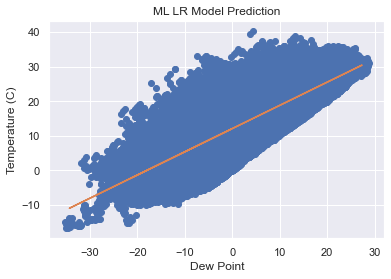

In [29]:
#Visualization of Linear Regression Trend
plt.xlabel("Dew Point")
plt.ylabel("Temperature (C)")
plt.title("ML LR Model Prediction")
plt.plot(x, y, 'o')
plt.plot(x_test,y_pred)
plt.show()

In [75]:
#User-input Prediction

lst = []
pred_lst = []

validation = "Y"
while validation == "Y":
    choice = float(input("Enter Dew Point: "))
    lst.append(choice)
    validation = input("Enter another value? (Y/N): ").upper()
    
for x in lst:
    pred = lr_model.predict([[x]])[0]
    pred_lst.append(pred)

user_df = pd.DataFrame()
user_df["Dew Point"] = lst
user_df["Temp_pred"] = pred_lst

user_df.round(2)

Enter Dew Point: 11.1
Enter another value? (Y/N): y
Enter Dew Point: 20.0
Enter another value? (Y/N): n


,Dew Point,Temp_pred
0,11.1,19.54
1,20.0,25.52


## Multiple Regression
- Predictors: Dew Point, Month, Air Pressure
- Target: Temperature

In [171]:
x = df[["DEWP", "month", "PRES"]]
y = df["TEMP"]

#CORRELATION MATRIX
Corrs = df[["DEWP", "month", "PRES", "TEMP"]].corr()
Corrs[['TEMP']]

,TEMP
DEWP,0.806634
month,0.131943
PRES,-0.829291
TEMP,1.000000


In [172]:
#Split Data into Training and Testing (80/20)
from sklearn.model_selection import train_test_split as SPLIT
X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.2,
                                                   random_state = 10)

#Model Development
lr_model = LinearRegression().fit(X_train, y_train)

In [173]:
#Prediction and Performance Evaluation
y_pred = lr_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

y_pred_train = lr_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

r2_scores = pd.DataFrame()
r2_scores['LR'] = [r2_train, r2_test]

r2_scores.rename(index = {0: "Train", 1:"Test"}, inplace = True)
r2_scores

,LR
Train,0.764851
Test,0.763689


## Lasso Regression

In [174]:
#Model Development
from sklearn.linear_model import Lasso
#start at .05
lasso_model = Lasso(alpha=.52).fit(X_train, y_train)

In [175]:
#Preditction and Performance Evaluation
y_pred = lasso_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

y_pred_train = lasso_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

r2_scores["Lasso"] = [r2_train, r2_test]
r2_scores

,LR,Lasso
Train,0.764851,0.764826
Test,0.763689,0.763696


In [176]:
def optimization(model, X_train, X_test, y_train, y_test):
    optimization_df = pd.DataFrame()
    for a in np.arange(0, 2, 0.01):
        my_model = model(alpha = a).fit(X_train, y_train)
        y_predict_train = my_model.predict(X_train)
        y_predict = my_model.predict(X_test)
        optimization_df[f'Alpha={a:.2f}'] = [r2_score(y_train, y_predict_train),r2_score(y_test, y_predict)]
    optimization_df.rename(index = {0: "Train", 1:"Test"}, inplace = True)

    lst1 = []

    for x in range(len(optimization_df.columns)):
        lst1.append(optimization_df.iloc[1, x])
    
    col_index = lst1.index(max(lst1))          
    return optimization_df.iloc[:,col_index]

In [177]:
optimization(Lasso, X_train, X_test, y_train, y_test)

/var/folders/2n/y8fl7fr16hs_g_085s9fnpqm0000gn/T/ipykernel_92178/1576320378.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  my_model = model(alpha = a).fit(X_train, y_train)
/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+05, tolerance: 3.063e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

Train    0.764826
Test     0.763696
Name: Alpha=0.52, dtype: float64

## Lasso Regression Scaled

In [178]:
#Normalize/Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Fit Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
#Model Development
lasso_scaled_model = Lasso(alpha=.05).fit(X_train_scaled, y_train)

In [180]:
#Prediction and Performance Evaluation
y_pred = lasso_scaled_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)

y_pred_train = lasso_scaled_model.predict(X_train_scaled)
r2_train = r2_score(y_train, y_pred_train)

r2_scores["Lasso (Scaled)"] = [r2_train, r2_test]

r2_scores

,LR,Lasso,Lasso (Scaled)
Train,0.764851,0.764826,0.764241
Test,0.763689,0.763696,0.763242


In [181]:
#Optimization of Alpha Parameter
optimization(Lasso, X_train_scaled, X_test_scaled, y_train, y_test)

/var/folders/2n/y8fl7fr16hs_g_085s9fnpqm0000gn/T/ipykernel_92178/1576320378.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  my_model = model(alpha = a).fit(X_train, y_train)
/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+05, tolerance: 3.063e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

Train    0.764851
Test     0.763689
Name: Alpha=0.00, dtype: float64

## Ridge Regression

In [182]:
#Model Development
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.7).fit(X_train,y_train)

In [183]:
#Prediction and Performance Evaluation
y_pred = ridge_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

y_pred_train = ridge_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

r2_scores["Ridge"] = [r2_train, r2_test]

r2_scores

,LR,Lasso,Lasso (Scaled),Ridge
Train,0.764851,0.764826,0.764241,0.764851
Test,0.763689,0.763696,0.763242,0.763689


In [184]:
optimization(Ridge, X_train, X_test, y_train, y_test)

Train    0.764851
Test     0.763689
Name: Alpha=1.99, dtype: float64

## Ridge Regression Scaled

In [185]:
#Model development
ridge_scaled_model = Ridge(alpha=0.7).fit(X_train_scaled, y_train)

In [186]:
#Prediction and Performance Evaluation
y_pred = ridge_scaled_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)

y_pred_train = ridge_scaled_model.predict(X_train_scaled)
r2_train = r2_score(y_train, y_pred_train)

r2_scores["Ridge (Scaled)"] = [r2_train, r2_test]

r2_scores

,LR,Lasso,Lasso (Scaled),Ridge,Ridge (Scaled)
Train,0.764851,0.764826,0.764241,0.764851,0.764851
Test,0.763689,0.763696,0.763242,0.763689,0.763694


In [188]:
optimization(Ridge, X_train_scaled, X_test_scaled, y_train, y_test)

Train    0.764850
Test     0.763701
Name: Alpha=1.99, dtype: float64

## Polynomial Regression

In [191]:
#Model Development
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

x_poly = poly.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.25,
                                                    random_state = 0)


In [192]:
#Prediction and Performance Evaluation
lr_poly_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_poly_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

y_pred_train = lr_poly_model.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)

r2_scores["Poly2 LR"] = [r2_train, r2_test]

r2_scores


,LR,Lasso,Lasso (Scaled),Ridge,Ridge (Scaled),Poly2 LR
Train,0.764851,0.764826,0.764241,0.764851,0.764851,0.838767
Test,0.763689,0.763696,0.763242,0.763689,0.763694,0.836108


## KNN
- Predict Wind Direction 

In [77]:
df2 = df.copy()
df2['wd'].unique()

array(['NNW', 'NW', 'N', 'W', 'ENE', 'NE', 'E', 'NNE', 'SW', 'SSW', 'S',
       'WSW', 'ESE', 'SE', 'WNW', 'SSE'], dtype=object)

In [78]:
#Cut Dataset to (N,S,E,W,NW,NE,SE,SW)

#Categorize Wind Direction
conditions = conditions = [
    (df2['wd'] == 'N'),
    #(df2['wd'] == 'NW'),
    #(df2['wd'] == 'NE'),
    (df2['wd'] == 'W'),
    (df2['wd'] == 'E'),
    (df2['wd'] == 'S'),
    #(df2['wd'] == 'SW'),
    #(df2['wd'] == 'SE'),
]

values = [0,1,2,3]
df2["Wind_Direction"] = np.select(conditions,values)
   
#x= ['N','S','E','W','NW','NE','SE','SW']
x= ['N','S','E','W']
df2 = df2[df2.wd.isin(x)]

In [79]:
#Correlation Matrix
corr = df2.corr()

corr.loc[['Wind_Direction']]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Wind_Direction
Wind_Direction,0.035954,0.024196,0.04344,0.021383,0.097076,0.178994,0.170022,0.113657,0.085493,0.139015,0.184255,0.19562,-0.171244,0.245837,-0.006985,-0.172133,1.0


In [80]:
x = df2[['TEMP', 'WSPM', 'hour']]
y = df2["Wind_Direction"]

#Split Data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [81]:
#Scale to Uniformally Evaluate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
#Develop KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN_Wind = KNeighborsClassifier(n_neighbors = 22)   # k = n_neighbors. k = 5 is a common value to start with
KNN_Wind.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=22)

In [83]:
#Prediction and Performance Evaluation on Test
knn score = KNN_Wind.score(X_test_scaled, y_test)
print("Accuracy Score:", knn_score)

0.5726937269372694

In [76]:
#optimize n value

def knn_optimization(n):
    optimization_df = pd.DataFrame()
    lst=[]
    for k in range(1,n+1):
        KNN_Wind = KNeighborsClassifier(n_neighbors = k)
        KNN_Wind.fit(X_train_scaled, y_train)
        lst.append(KNN_Wind.score(X_test_scaled, y_test))
    print("Optimal n:", lst.index(max(lst))+1)
    print("Accuracy Score:", lst[lst.index(max(lst))])
    
knn_optimization(30)

Optimal n: 22
Accuracy Score: 0.5726937269372694


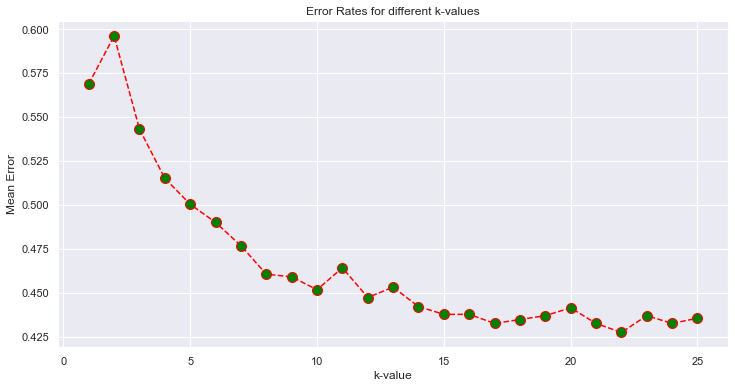

3

In [75]:
#Visualization of errors and optimized K Value
error = []

# calculate the error for k values between 1 and 40
for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    pred_y_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_y_i != y_test))
    
    
# Now, we can plot the errors
plt.figure(figsize = (12, 6))
plt.plot(range(1, 26), error, color = 'red', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rates for different k-values')
plt.xlabel('k-value')
plt.ylabel('Mean Error')
plt.show()

lst = [1,3,4,2]
lst.index(max(lst))+1
#lst[lst.index(max(lst))]

In [21]:
#User Prediction

temp = float(input("Enter Temperature: "))
unknown.append(temp)

wspm = float(input("Enter Wind Speed: "))
unknown.append(wspm)

hour = int(input("Enter Hour: "))
unknown.append(hour)

unknown = [[temp, wspm, hour]]

print()
wind_prediction = KNN_Wind.predict(unknown)

if wind_prediction[0] == 0:
    print('North')
if wind_prediction[0] == 1:
    print('South')
if wind_prediction[0] == 2:
    print('East')
if wind_prediction[0] == 3:
    print('West')
    
#fruit_prediction[0]

Enter Temperature: 1.5
Enter Wind Speed: 2.4
Enter Hour: 19
North


## Logistic Regression
- Predict Rainfall

In [196]:
df3 = df.copy()

#Clean Rain column and convert to binary
df3['RAIN'].replace(0, np.nan, inplace=True)

conditions = [
    (df3['RAIN'].isna() == True),
    (df3['RAIN'].isna() == False),
]

values = [0,1]

df3['Rain'] = np.select(conditions,values)

<AxesSubplot:xlabel='DEWP', ylabel='Rain'>

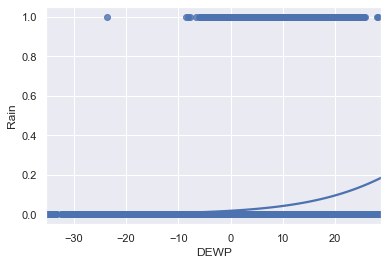

In [197]:
#VISUALIZATION
x = df3[["DEWP"]]
y = df3["Rain"]

sb.regplot(x=x, y=y, data=df3, logistic=True, ci=None)

In [198]:
#split x and y into training and testing sets (75/25)

X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [199]:
#Prediction and Performance Evaluation
y_pred = log_model.predict(X_test)

y_pred_train = log_model.predict(X_train)

from sklearn import metrics

log_score = pd.DataFrame()

test_score = metrics.accuracy_score(y_test, y_pred)

train_score = metrics.accuracy_score(y_train, y_pred_train)

log_score['Logistic'] = [train_score, test_score]
log_score.rename(index = {0: "Train", 1:"Test"}, inplace = True)

log_score

,Logistic
Train,0.963477
Test,0.959525


In [200]:
#User input?
choice = float(input("Enter Temperature: "))
pred = log_model.predict([[choice]])

if pred[0] == 0:
    print("No Rain")
else:
    print("Rain")

Enter Temperature: 100
Rain


/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## SVM
- Predict Rainfall Uutilizing Temperature Features

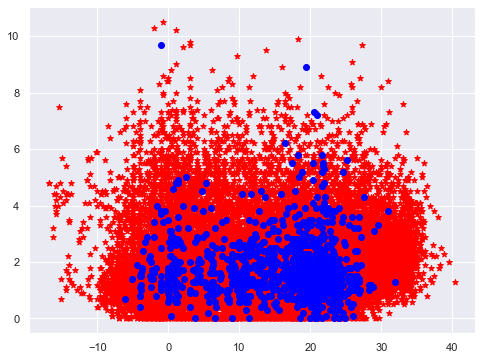

In [201]:
no_rain = df3[df3["Rain"]==0]
rain = df3[df3["Rain"]==1]

no_rain_x = no_rain["TEMP"]
no_rain_y = no_rain["WSPM"]

rain_x = rain["TEMP"]
rain_y = rain["WSPM"]

plt.figure(figsize = (8,6))
plt.scatter(no_rain_x, no_rain_y, marker = '*', color = 'red')
plt.scatter(rain_x, rain_y, marker = 'o', color = 'blue')
plt.show()

#Map to Higher Dimension using Kernel Trick

In [22]:
#Dropna to fit into SVM
df3.dropna(subset=["TEMP","WSPM"],inplace=True)

In [6]:
sum(df3['TEMP'].isna())

0

In [23]:
x = df3[["TEMP","WSPM"]]
y = df3["Rain"]

#Split Data into Training and Testing (80/20)
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.20, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [25]:
# Develop SVM Linear Kernel Model
from sklearn.svm import SVC

My_SVM = SVC(kernel = 'linear', C=1)
My_SVM.fit(x_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [27]:
#Prediction and Performance Evaluation
from sklearn.metrics import accuracy_score
y_pred = My_SVM.predict(x_test_scaled)
test_score = accuracy_score(y_test, y_pred)

y_pred_train = My_SVM.predict(x_train_scaled)
train_score = accuracy_score(y_train, y_pred_train)

svm_scores = pd.DataFrame()
svm_scores["SVM(Linear)"] = [train_score, test_score]
svm_scores.rename(index = {0: "Train", 1:"Test"}, inplace = True)
svm_scores

,SVM(Linear)
Train,0.963247
Test,0.959459


/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/sandeepk/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


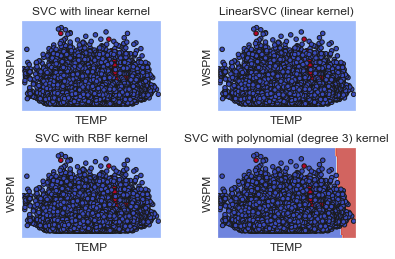

In [38]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(x_train_scaled, y_train) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x.iloc[:, 0], x.iloc[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        #xlabel=iris.feature_names[0],
        #ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()